# <center> HR Analytics
## <center> MGMT 586 Python - Group Project

### <center> Session 3 - Team 6

### Introduction

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision
Please refer to the following task for more details:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015

### Loading datasets and libraries

In [84]:
#Installing packages
!pip install imblearn
!pip install xgboost
!pip install squarify

In [85]:
#Handling data frames
import pandas as pd
import numpy as np

#Visualising data
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import matplotlib.ticker as ticker
import seaborn as sns
import squarify
import missingno as msno

#Data Wrangling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Hiding warnings
import warnings
warnings.filterwarnings("ignore")

#Viewing style
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows", 1000)

In [86]:
#Loading data sets

full_train = pd.read_csv("aug_train.csv")
full_test = pd.read_csv("aug_test.csv")
data1 = full_train.copy()

full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### Exploratory Data Analysis

In [87]:
full_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [88]:
list_categorical = ["city", 
                    "gender", 
                    "relevent_experience", 
                    "enrolled_university",
                    "education_level",
                    "major_discipline",
                    "experience",
                    "company_size",
                    "company_type",
                    "last_new_job"]

list_non_categorical = ['enrollee_id', 
                        "city_development_index", 
                        "training_hours", 
                        "target"]

In [89]:
for c in list_categorical[1:]:
    print(c, full_train[c].unique())
    print(full_train[c].value_counts(dropna=False)/len(full_train), end = "\n\n")

gender ['Male' nan 'Female' 'Other']
Male      0.690103
NaN       0.235306
Female    0.064621
Other     0.009970
Name: gender, dtype: float64

relevent_experience ['Has relevent experience' 'No relevent experience']
Has relevent experience    0.719908
No relevent experience     0.280092
Name: relevent_experience, dtype: float64

enrolled_university ['no_enrollment' 'Full time course' nan 'Part time course']
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
NaN                 0.020148
Name: enrolled_university, dtype: float64

education_level ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
Graduate          0.605387
Masters           0.227633
High School       0.105282
NaN               0.024011
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64

major_discipline ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
STEM               0.756446
NaN                0.146832
Humani

In [90]:
#Manipulating the categorical variables 
full_train['last_new_job'] = full_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
full_train['enrolled_university'][full_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
full_train['company_size'] = full_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

full_train['experience'] = full_train['experience'].apply(lambda x: '0' if x == '<1' else x)
full_train['experience'] = full_train['experience'].apply(lambda x: '21' if x == '>20' else x)

full_train['company_size'].fillna('0',inplace=True)
full_train['company_type'].fillna('Unknown',inplace=True)
full_train['major_discipline'].fillna('Unknown',inplace=True)
full_train['gender'].fillna('Not provided',inplace=True)

In [91]:
full_train.dropna(inplace=True)

In [92]:
full_train['experience'] = full_train['experience'].astype(str).astype(int)
full_train['training_hours'] = full_train['training_hours'].astype(str).astype(int)

In [93]:
#Order of categorical variables
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

#### Graphs

Let's understand our data.

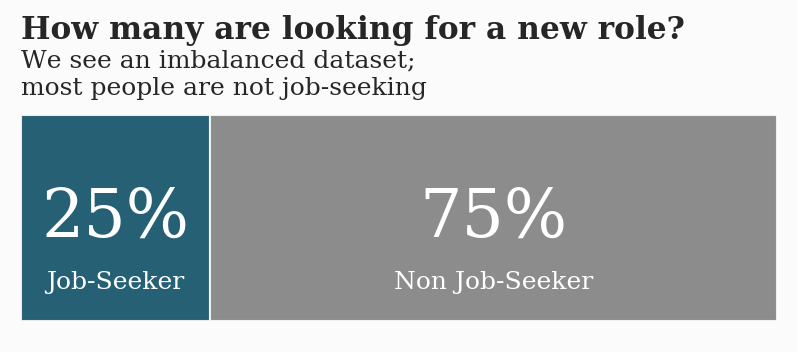

In [94]:
background_color = "#fbfbfb"

x=full_train.groupby(['target'])['target'].count()
y=len(full_train)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, \
        ec=background_color, label='Job-Seeker')#1.0 is index
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray',\
        alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),\
                va = 'center', ha='center',fontsize=32, fontweight='light',\
                fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center',\
                ha='center',fontsize=12, fontweight='light', fontfamily='serif',\
                color='white')
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),\
                va = 'center', ha='center',fontsize=32, fontweight='light',\
                fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),\
                va = 'center', ha='center',fontsize=12, fontweight='light',\
                fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', \
         fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',\
         fontfamily='serif',fontsize=12)  


plt.show()

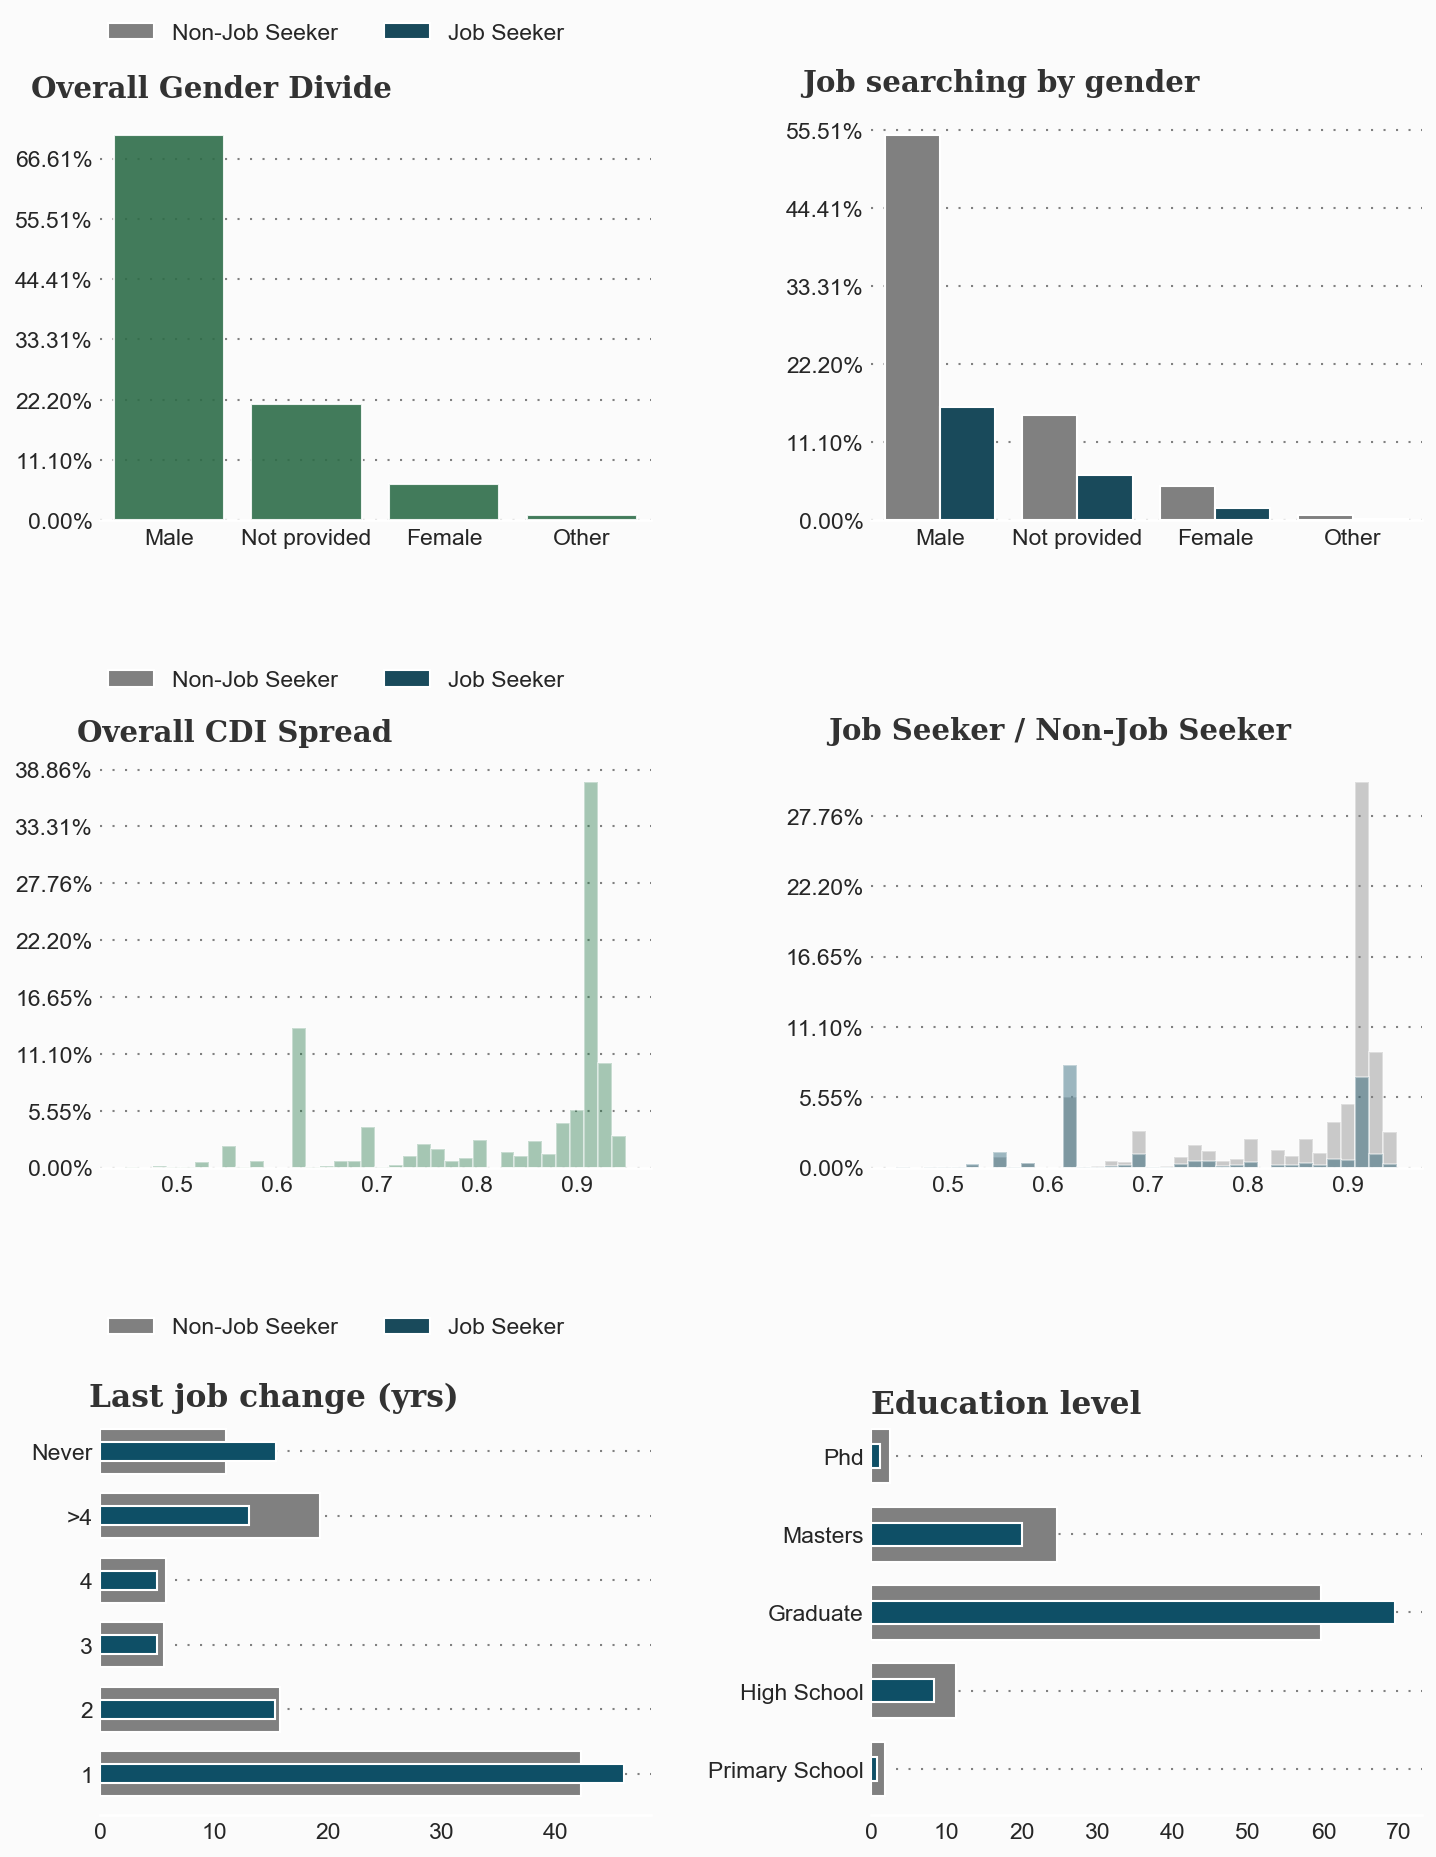

In [95]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150) #figsize is in inch default 6.4x4.8 and 100dpi
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3) #9 plots arranged in a 3x3 grid
gs.update(wspace=0.4, hspace=0.6) #space between subplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

#gender overall
ax0.text(-1, 14050, 'Overall Gender Divide', fontsize=14, fontweight='bold', \
         fontfamily='serif', color="#323232")
sns.countplot(x=full_train["gender"], color="#247747", ax=ax0, zorder=3, alpha=0.9) 
#zorder layers things over other, alpha is transparency
vals0 = ax0.get_yticks()/len(full_train)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in vals0])

#Distribution
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14,\
         fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=full_train, \
              palette=color_palette, ax=ax1, zorder=3)
vals1 = ax1.get_yticks()/len(full_train)
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])

#Legend
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], \
           ncol=2, bbox_to_anchor=(-0.52, 1.28), \
           facecolor=background_color, edgecolor=background_color)
legend_labels, _= ax1.get_legend_handles_labels()
ax3.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], \
           ncol=2, bbox_to_anchor=(-0.52, 1.28), \
           facecolor=background_color, edgecolor=background_color)
legend_labels, _= ax1.get_legend_handles_labels()
ax5.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], \
           ncol=2, bbox_to_anchor=(-0.52, 1.28), \
           facecolor=background_color, edgecolor=background_color)

#CDI
ax2.text(0.40, 7500, 'Overall CDI Spread', fontsize=14, fontweight='bold', \
         fontfamily='serif', color="#323232")
sns.distplot(full_train["city_development_index"], color="#247747", \
             ax=ax2, bins=int(180/5), hist = True, kde = False)
vals2 = ax2.get_yticks()/len(full_train)
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])

#CDI of job seeker
ax3.text(0.38, 6100, 'Job Seeker / Non-Job Seeker',\
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.distplot(full_train.loc[(full_train["target"]==0), "city_development_index"],\
            color="gray", label="Not Survived", ax=ax3, bins=int(180/5), \
            hist = True, kde = False)
sns.distplot(full_train.loc[(full_train["target"]==1), "city_development_index"],\
            color="#0e4f66", label="Survived", ax=ax3, bins=int(180/5), \
            hist = True, kde = False)
vals3 = ax3.get_yticks()/len(full_train)
ax3.set_yticklabels(['{:,.2%}'.format(x) for x in vals3])

#Making new dataframes
full_train['count'] = 1
job_hunt_only = full_train[full_train['target']==1]
no_job_hunt_only = full_train[full_train['target']==0]

job_change = full_train.groupby(['education_level','last_new_job'])['experience']\
                .sum().unstack().loc[ed_order,job_order]
job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count']\
                .sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count']\
                .sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"]\
                        .apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"]\
                        .apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])\
                        ['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])\
                        ['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"]\
                        .apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"]\
                        .apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

#last new job
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15,\
         fontweight='bold', fontfamily='serif',color='#323232')
ax4.barh(notseek_job_change.index, notseek_job_change['percentage'],\
         color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'],\
         color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))

#Education level
ax5.text(0, 4.55, 'Education level', fontsize=15,\
         fontweight='bold', fontfamily='serif',color='#323232')
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'],\
         color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'],\
         color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

#formatting
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")
        
for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5)) 
        
plt.show()

Some inferences that we can take from this graph,
- We note that most job-seekers are Male. This is not all that surprising as in this dataset Males make up the majority of the sample population.

- What is more interesting though is the City Development Index (CDI) chart. There we see that there are two peaks for job-seekers. The peaks are at high and low CDI scores. 

- We can ponder why this might be. In high CDI areas perhaps there are a lot of opportunities and therefore people feel encouraged to seek better roles.

- Perhaps in lower CDI areas candidates want to improve their circumstances by searching for new jobs, maybe in new areas. 

- This is all conjecture, but interesting nonetheless.

- It is also interesting to see that job-seekers have changed job more often that non-job seekers within that past 1 year, and also those that have never looked for a job also seem to be ready for a new challenge.

- However it is only the graduate level people who have more job seekers when compared to other education levels. Some are even seeking a job in their primary school! (Start networking BAIMers)

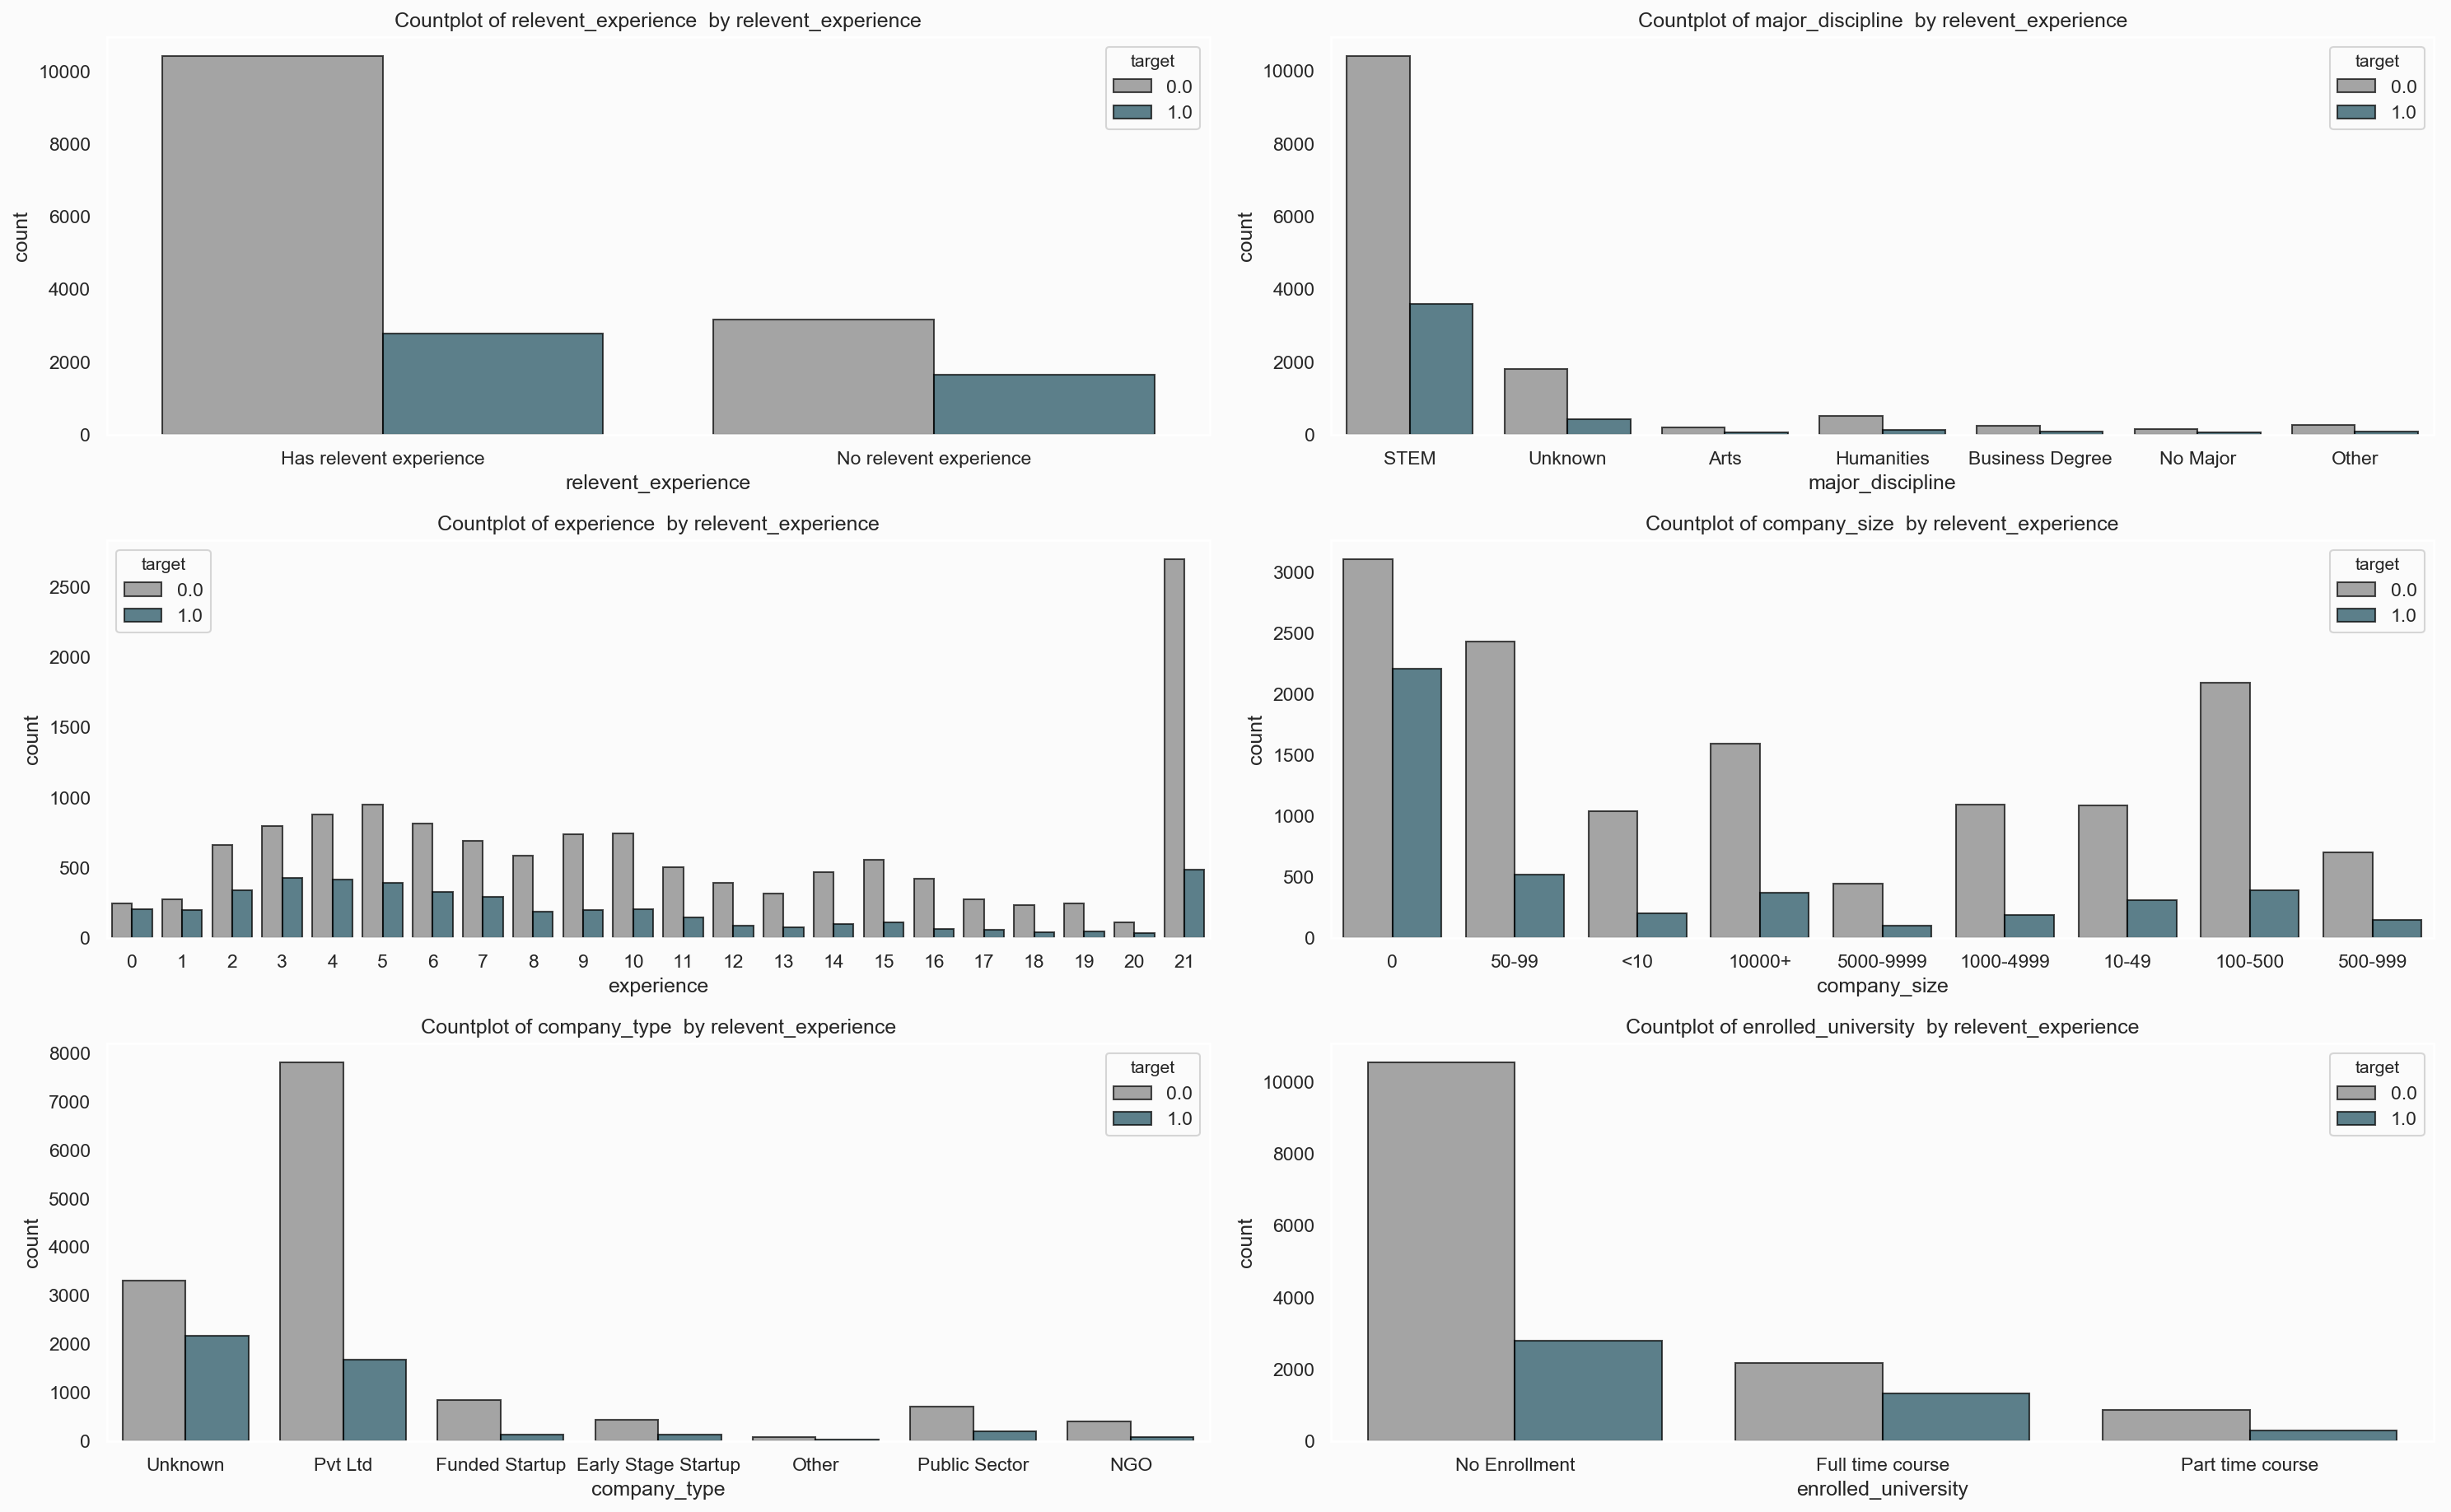

In [96]:
background_color = "#fbfbfb"
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(20,16), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
fft=["relevent_experience", "major_discipline", "experience", "company_size", "company_type", 'enrolled_university']
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f,palette=color_palette, hue='target',\
                  edgecolor="black", alpha=0.7, data=full_train)
    
    plt.title("Countplot of {}  by relevent_experience".format(f))
    n=n+1
    
plt.tight_layout()
plt.show()

The largest groups with relevant experience are:
men, students, STEM specialization, maybe people have more choice, current company type PVT LTD, over 20 years of experience

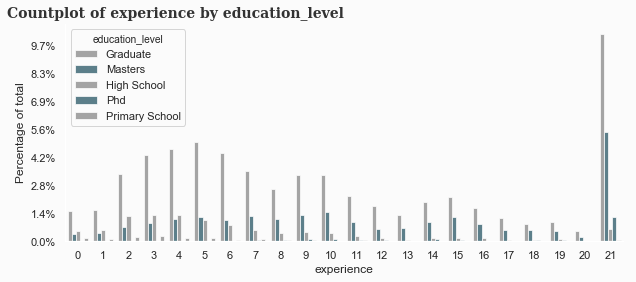

In [97]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(10,4), 'figure.facecolor': background_color,\
            'axes.facecolor':background_color, 'axes.grid': False})
sns.countplot(x='experience',palette=color_palette, hue='education_level',\
              edgecolor="white", alpha=0.7, data=full_train)
sns.despine()
plt.title("Countplot of experience by education_level",fontsize=14, fontweight='bold', \
         fontfamily='serif', color="#323232", ha = 'right')
ax.set_ylabel("Percentage of total")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(full_train)))

plt.show()

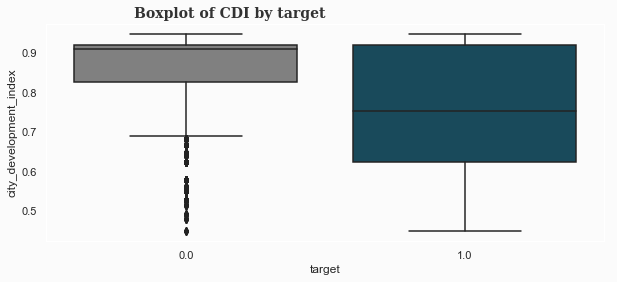

In [98]:
sns.set(rc={'figure.figsize':(10,4), 'figure.facecolor': background_color,\
            'axes.facecolor':background_color, 'axes.grid': False})
sns.boxplot(x='target', y='city_development_index',palette=color_palette,\
            data=full_train)
plt.title("Boxplot of CDI by target",fontsize=14, fontweight='bold', \
         fontfamily='serif', color="#323232", ha = 'right')

plt.show()

People from high CDI score are less likely to seek job later on. 
The probability of a new job search increases when city development index is lower.

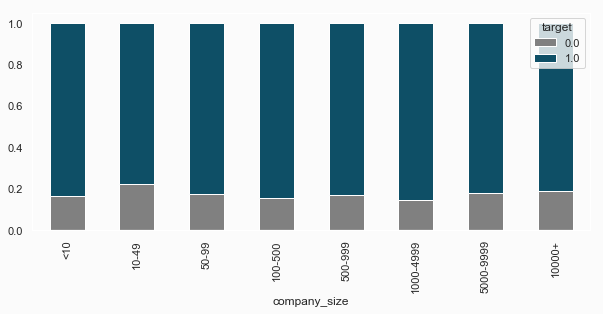

In [99]:
com = full_train.groupby(['company_size', 'target'])['target'].count().unstack().loc[size_order]
com.drop(com.head(1).index, inplace = True)
temp = com[0]/(com[0]+com[1])
com[0] = com[1]/(com[0]+com[1])
com[1] = temp

com.plot(kind = 'bar', stacked = True, color = color_palette)

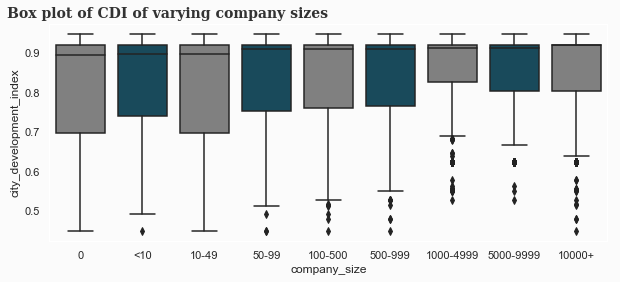

In [100]:
fig, ax9 = plt.subplots()
sns.set(rc={'figure.figsize':(10,4), 'figure.facecolor': background_color,\
            'axes.facecolor':background_color, 'axes.grid': False})
sns.boxplot(x='company_size', y='city_development_index', palette=color_palette,\
            data=full_train, ax= ax9, order = size_order)
ax9.set_title("Box plot of CDI of varying company sizes",fontsize=14, fontweight='bold', \
         fontfamily='serif', color="#323232", ha = 'right')
plt.show()

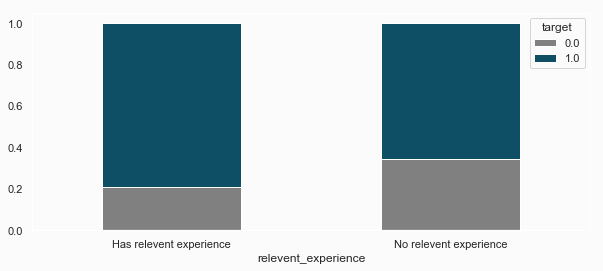

In [101]:
rel = full_train.groupby(['relevent_experience', 'target'])['target'].count().unstack()

temp = rel[0]/(rel[0]+rel[1])
rel[0] = rel[1]/(rel[0]+rel[1])
rel[1] = temp

rel.plot(kind = 'bar', stacked = True, color = color_palette, rot = 0)

Big companies usually are placed in cities with a high rating of city development index.

### Data Cleaning

In [102]:
df = data1.drop(list_non_categorical, axis=1)

In [103]:
cat_dummies = pd.get_dummies(df, drop_first=True) ## to avoid dummy variable trap
cat_dummies.head()

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [104]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(cat_dummies), columns = cat_dummies.columns)
df.head()

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [105]:
df = pd.concat([df, data1[list_non_categorical]], axis=1)
df.head()

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,city_city_144,city_city_145,city_city_146,city_city_149,city_city_150,city_city_152,city_city_155,city_city_157,city_city_158,city_city_159,city_city_16,city_city_160,city_city_162,city_city_165,city_city_166,city_city_167,city_city_171,city_city_173,city_city_175,city_city_176,city_city_179,city_city_18,city_city_180,city_city_19,city_city_2,city_city_20,city_city_21,city_city_23,city_city_24,city_city_25,city_city_26,city_city_27,city_city_28,city_city_30,city_city_31,city_city_33,city_city_36,city_city_37,city_city_39,city_city_40,city_city_41,city_city_42,city_city_43,city_city_44,city_city_45,city_city_46,city_city_48,city_city_50,city_city_53,city_city_54,city_city_55,city_city_57,city_city_59,city_city_61,city_city_62,city_city_64,city_city_65,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,enrollee_id,city_development_index,training_hours,target
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8949,0.920,36,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [106]:
X_train = df.loc[:, df.columns != 'target']

Y_train = df['target']


smt= SMOTE()
X_train_sm,Y_train_smt = smt.fit_resample(X_train, Y_train)
Y_train_smt.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

In [107]:
remain_columns = ['enrollee_id', 
                "city_development_index", 
                "training_hours"]
remainig_variables = X_train_sm[['enrollee_id', 
                "city_development_index", 
                "training_hours"]]
X_train_sm.drop(remain_columns,axis =1,inplace = True)

In [108]:
df = X_train_sm.copy()

imputer = KNNImputer(n_neighbors=6)   ## we can change this later if we want
df = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

In [109]:
df_logistic = pd.concat([df, remainig_variables, Y_train_smt], axis=1)
df_dummy = df.copy()

In [110]:
df_final = pd.DataFrame()
for col in list_categorical:
    df1=pd.DataFrame()
    for col1 in df_dummy.columns:
        if col1.startswith(col):
            if col == "city":
                df_dummy[col1] = np.where(df_dummy[col1]==1, col + "_"+col1.split(col+"_")[2], '')
            else:
                df_dummy[col1] = np.where(df_dummy[col1]==1, col1.split(col+"_")[1], '')
            df1 = pd.concat([df1, df_dummy[[col1]]], axis=1)
    df1[col] =df1[df1.columns].apply(lambda x: ''.join(x), axis=1)

    df_final = pd.concat([df_final,df1], axis=1)

In [111]:
original_data_categories = data1.dropna()

In [112]:
df_final = df_final[list_categorical]
df_final = pd.concat([remainig_variables, df_final,Y_train_smt], axis=1)

In [113]:
for col in original_data_categories.columns:
    try:
        missing_category = list(set(original_data_categories[col].unique()) - set(df_final[col].unique()))[0]
        df_final[col] = np.where(df_final[col] == '', missing_category, df_final[col])
    except:
        pass

### Modeling

We will be comparing the three models to see which one provides the best combination of acccuracy precision and recall. Since there is an imbalance in the dataset, we want the recall to be greater than our accuracy score. 

#### Logistic Regression

In [114]:
X = df_logistic.dropna().drop(columns=['target']).values
y = df_logistic.dropna()['target'].values

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [116]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
log_prediction = logmodel.predict(X_test)
cm_log = confusion_matrix(y_test, log_prediction)
log_df = pd.DataFrame(data=[accuracy_score(y_test, log_prediction), recall_score(y_test, log_prediction),
                   precision_score(y_test, log_prediction), roc_auc_score(y_test, log_prediction)], 
             columns=['Logisitc Regression Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [117]:
log_df

,Logisitc Regression Score
Accuracy,0.700320
Recall,0.679023
Precision,0.704956
ROC AUC Score,0.700117


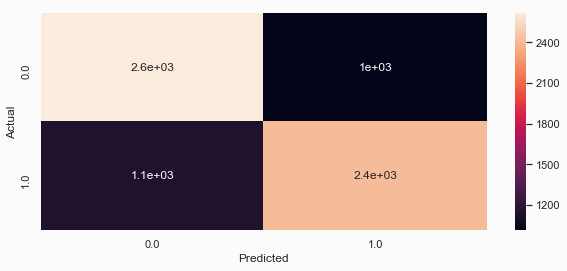

In [118]:
data = {'y_Actual':    y_test,
        'y_Predicted': log_prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [119]:
from matplotlib import pyplot

In [120]:
len(df_logistic.columns)

178

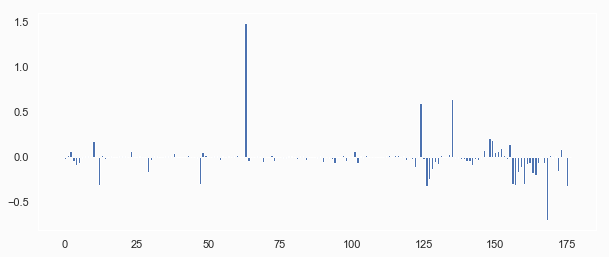

In [121]:
df_logistic = df_logistic.iloc[:,:-1]
importance = logmodel.coef_[0]
score = [v[1].round(5) for v in enumerate(importance)]
log_feature_importance = pd.DataFrame(data={'col_name':list(df_logistic.columns),
                  'score':score})

log_feature_importance = log_feature_importance.sort_values('score', ascending=False)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Random Forest

In [122]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)

rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                   precision_score(y_test, rfc_prediction), roc_auc_score(y_test, rfc_prediction)], 
             columns=['Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [123]:
rfc_df

,Random Forest Score
Accuracy,0.880823
Recall,0.929233
Precision,0.845427
ROC AUC Score,0.881283


In [124]:
importance = rfc.feature_importances_

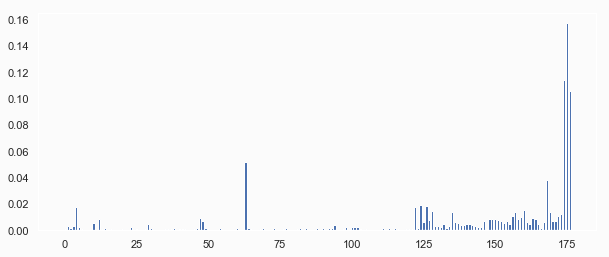

In [125]:
score = [v[1].round(5) for v in enumerate(importance)]
rfc_feature_importance = pd.DataFrame(data={'col_name':list(df_logistic.columns),
                  'score':score})

rfc_feature_importance = rfc_feature_importance.sort_values('score', ascending=False)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

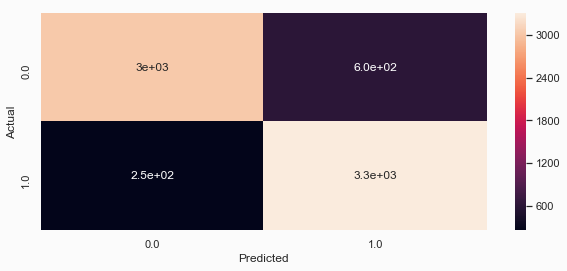

In [126]:
data = {'y_Actual':    y_test,
        'y_Predicted': rfc_prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### XGBoost

In [127]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[17:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
xgb_df = pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             columns=['XGBOOST Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [129]:
xgb_df

,XGBOOST Score
Accuracy,0.837575
Recall,0.849761
Precision,0.827002
ROC AUC Score,0.837691


In [130]:
importance = model.feature_importances_

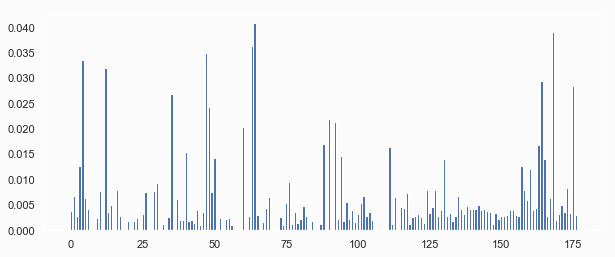

In [131]:
score = [v[1].round(5) for v in enumerate(importance)]
rfc_feature_importance = pd.DataFrame(data={'col_name':list(df_logistic.columns),
                  'score':score})

rfc_feature_importance = rfc_feature_importance.sort_values('score', ascending=False)
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

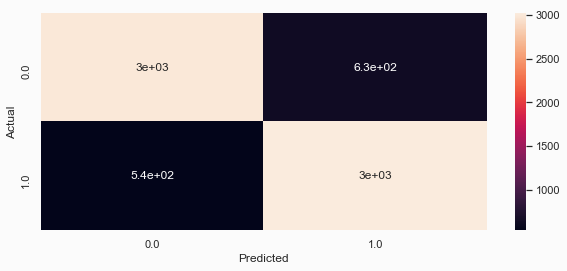

In [132]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

plt.show()

## Model Comparison

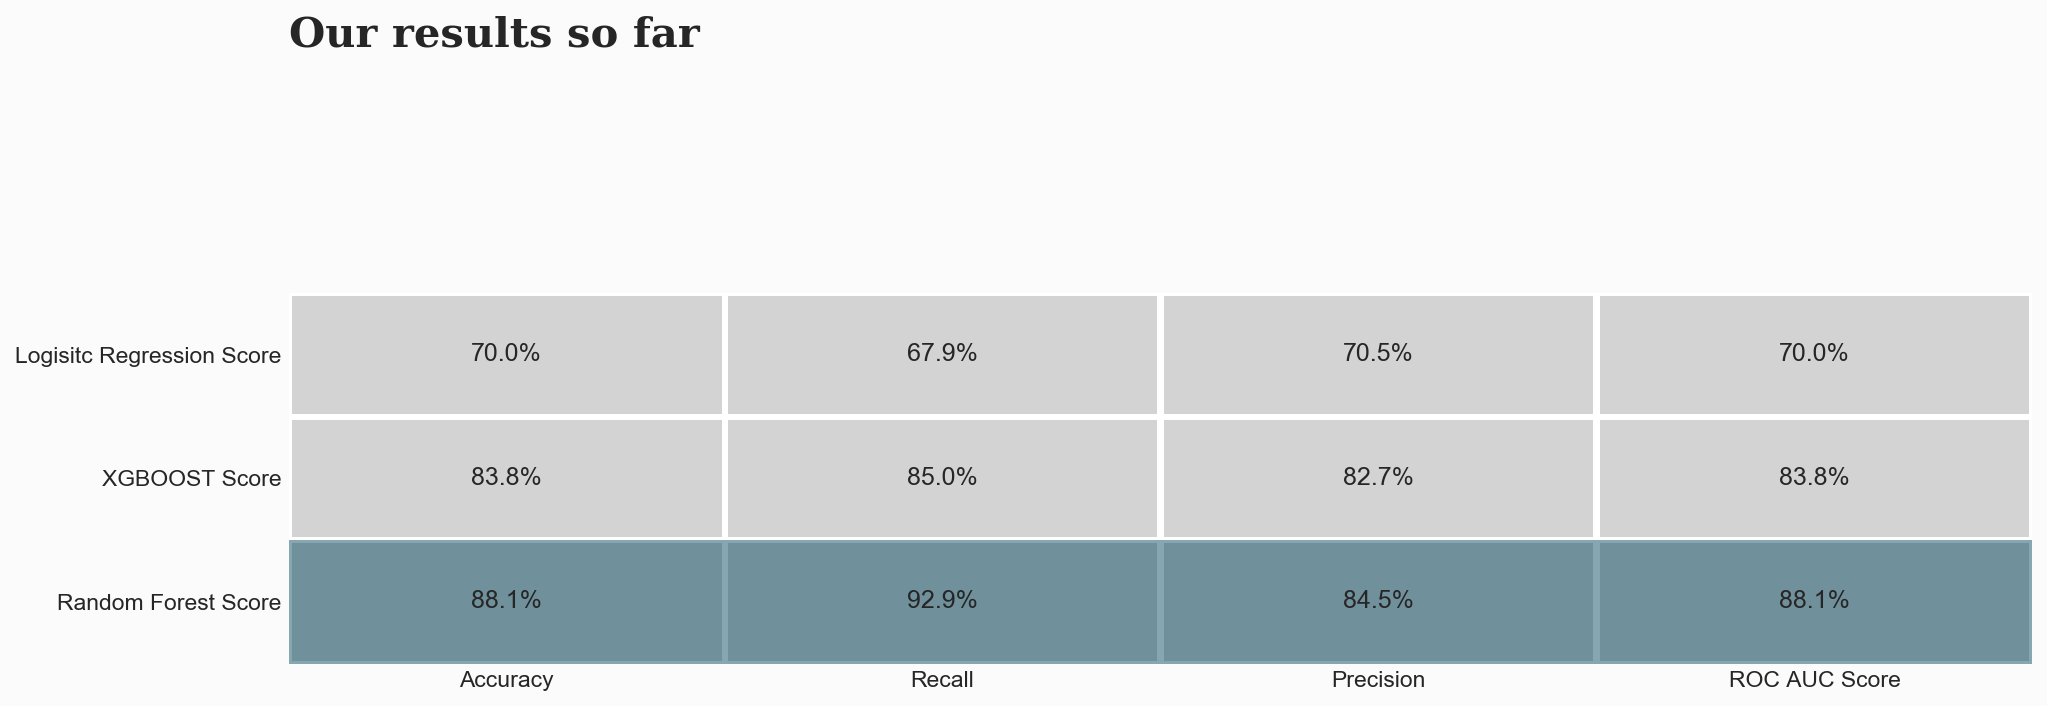

In [133]:
fig = plt.figure(figsize=(15,18), dpi=150)
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ["lightgray","lightgray"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)

# Overall
df_models = round(pd.concat([log_df, xgb_df,rfc_df], axis=1),3)
sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%", linewidths=2.5,cbar=False,ax=ax0)

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(0,-2,'Our results so far',fontfamily='serif',fontsize=20,fontweight='bold')

from matplotlib.patches import Rectangle

rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#0e4f66', edgecolor='white', lw=0,alpha=0.5))



plt.show()

### Conclusion

A data science company wanted to predict if the people who take their test are going to join their company or not, based on historical data. 
First we explored the data and saw if there are any peculiar correlations or entries present in the dataset. Then using KNN imputation technique we took care of the null values present in the dataset. Then we used different modeling techniques to see which model best fit our scenario. Turned out that Random Forrest performed best for our data with a prediction accuracy of 88.03%.
